In [1]:
import scineo as sn
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

In [2]:
def show_max(mat):
    for i in mat.columns:
        for j in mat.index:
            if mat[i][j] == mat.max().max():
                print("k = %s\t有最大识别率:%.2f%%"%(j,mat.max().max()*100))

In [3]:
#读取文件
train,train_y,test,test_y = np.load("DataSet/No4.npy")
#将图片拉升成一行
train_x,test_x = train.reshape(-1,128*128),test.reshape(-1,128*128)
#将样本合并成一个矩阵进行pca
X = np.concatenate([train_x,test_x])

In [ ]:
start = time.time()
l_1 = []
pca_number = 1892
#i为pca提取后的维度数
index = list(range(1,350,3))
for i in index:
    mat = sn.pca(X,n_components=i)
    train_x,test_x = mat[:len(train_y)],mat[len(train_y):]
    detail = mat.shape[1]
    l_2 = []
    #j为knn中k的值
    print("")
    print("pca = %f\tdetail = %d"%(i,i))
    #ac = sn.predict_svm(train_x,train_y,test_x,test_y,show=True)
    ac = sn.predict_svm(train_x,train_y,test_x,test_y,show=True)
    l_1.append(ac)
print("\ntiem = %.2fS"%(time.time() - start))

In [12]:
ps = pd.DataFrame(l_1)
ps.columns = ["RBF"]
ps.index = index
ps.to_csv("DataSet/pca_svm.csv")
print("训练样本数:%d\t测试样本数:%d"%(len(train_x),len(test_y)))
show_max(ps)

训练样本数:1342	测试样本数:789
k = 49	有最大识别率:99.75%
k = 52	有最大识别率:99.75%
k = 55	有最大识别率:99.75%
k = 58	有最大识别率:99.75%


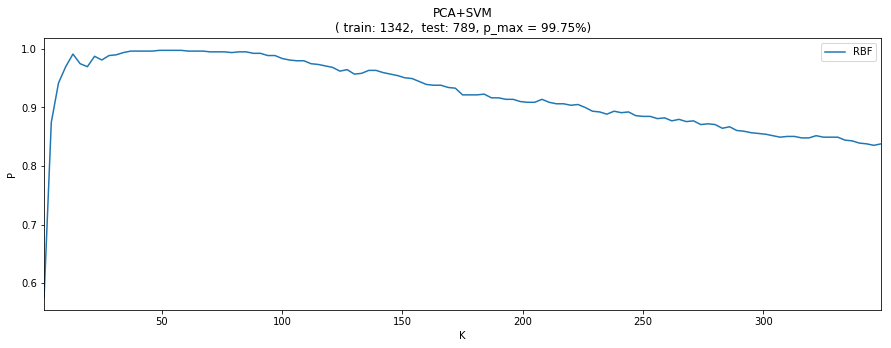

In [14]:
#ps = pd.read_csv("DataSet/pca_svm.csv")
im = ps.plot(figsize=(15,5))
plt.title("PCA+SVM\n( train: %d,  test: %d, p_max = %.2f%%)"%(len(train_x),len(test_y),ps.max().max()*100))
plt.
plt.xlabel("K")
plt.ylabel("P")
plt.savefig("DataSet/image/pca_svm.png")
plt.show()